## Toy examples: misleading ECE

In [2]:
import numpy as np
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

root = "/data/failure_detection"


def get_ece(p, is_correct):
    n_bins = 40
    ece = 0
    bin_boundaries = np.linspace(0, 1, n_bins + 1)
    for bin_lower, bin_upper in zip(bin_boundaries[:-1], bin_boundaries[1:]):
        # Calculated |confidence - accuracy| in each bin
        in_bin = (p >= bin_lower) * (p < bin_upper)
        if in_bin.sum() > 0:
            prop_in_bin = in_bin.mean()
            accuracy_in_bin = is_correct[in_bin].mean()
            avg_confidence_in_bin = p[in_bin].mean()
            ece += np.abs(avg_confidence_in_bin - accuracy_in_bin) * prop_in_bin
    return ece

In [3]:
# Simulate p(\hat{y} == y | x)
x = np.random.rand(10000)
correct = np.random.rand(10000) < x

# Simulate both model responses
c1 = x
c2 = x * 0.1 + 0.9

ece_1, roc_1 = get_ece(c1, correct), roc_auc_score(correct, c2)
ece_2, roc_2 = get_ece(c2, correct), roc_auc_score(correct, c2)

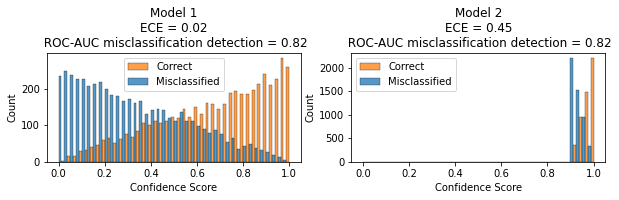

In [4]:
f, ax = plt.subplots(1, 2, figsize=(10, 2))
sns.histplot(
    x=c1,
    hue=correct,
    ax=ax[0],
    bins=np.linspace(0, 1 + 1e-8, 41),
    multiple="dodge",
    legend=False,
)
sns.histplot(
    x=c2,
    hue=correct,
    ax=ax[1],
    bins=np.linspace(0, 1 + 1e-8, 41),
    multiple="dodge",
    legend=False,
)
ax[0].legend(loc="upper center", labels=["Correct", "Misclassified"])
ax[1].legend(loc="upper left", labels=["Correct", "Misclassified"])
ax[0].set_xlabel("Confidence Score")
ax[0].set_title(
    f"Model 1\nECE = {ece_1:.2f}\n ROC-AUC misclassification detection = {roc_1:.2f}"
)
ax[1].set_xlabel("Confidence Score")
ax[1].set_title(
    f"Model 2\nECE = {ece_2:.2f}\n ROC-AUC misclassification detection = {roc_2:.2f}"
)
plt.savefig(
    format="pdf",
    fname=str(Path(root) / "outputs" / "figures" / f"toy_example_calibration.pdf"),
    bbox_inches="tight",
)